In [ ]:
#Project title
#                 My Choice! -Predicting a Food Item Nutrition Score
#                            By Dr. Kholoud H. Khateeb, Jan 13th, 2022
#Project objective
#Develop a machine-learning model that analyzes a nutrition dataset to understand the 
#features of the data and predict the food items with high nutrition 
#scores based on the French scoring system “nutrition-score-fr_100g”. This could be useful  
#for individuals from differnt group ages that care about healthy lifestyle or diabetic 
#patients when selecting their food choices.



#Dataset project
#"The project gathers information and data on food products from around the world.[1]
#For each item, the database stores its generic name, quantity, type of packaging, brand,
#category, manufacturing or processing locations, countries and stores where the product is sold, 
#list of ingredients, any traces (for allergies, dietary laws or any specific diet), 
#food additives and nutritional information. The nutritional value is calculated using the Nutri-Score."[11]
#Source: https://en.wikipedia.org/wiki/Open_Food_Facts



#Dataset structure
#The dataset contains a single table, FoodFacts, in CSV form in FoodFacts.csv and in 
#SQLite form in database.sqlite. [163 columns and 356,027 total values]. 
#File name: en.openfoodfacts.org.products.tsv

#After removing some of the irrelevant columns and rows the data size is now 49040 rows × 123 columns. 
#Possibly this number will go lower with further cleaning for the data.



In [ ]:
# Data Cleaning 

In [3]:
import os
import csv
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import statsmodels.formula.api as sm

%matplotlib inline

#print(os.getcwd())
data = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

In [105]:
data.shape

(356027, 162)

In [3]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [5]:
data.set_index('code', inplace=True)

In [6]:
data.head()

url  \
code                                                               
0000000003087  http://world-en.openfoodfacts.org/product/0000...   
0000000004530  http://world-en.openfoodfacts.org/product/0000...   
0000000004559  http://world-en.openfoodfacts.org/product/0000...   
0000000016087  http://world-en.openfoodfacts.org/product/0000...   
0000000016094  http://world-en.openfoodfacts.org/product/0000...   

                                  creator   created_t      created_datetime  \
code                                                                          
0000000003087  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
0000000004530             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
0000000004559             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
0000000016087             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
0000000016094             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

              last_modified_t last_modified_datetime  \
code                                                   
0000000003087      1474103893   2016-09-17T09:18:13Z   
0000000004530      1489069957   2017-03-09T14:32:37Z   
0000000004559      1489069957   2017-03-09T14:32:37Z   
0000000016087      1489055731   2017-03-09T10:35:31Z   
0000000016094      1489055653   2017-03-09T10:34:13Z   

                                 product_name generic_name quantity packaging  \
code                                                                            
0000000003087              Farine de blé noir          NaN      1kg       NaN   
0000000004530  Banana Chips Sweetened (Whole)          NaN      NaN       NaN   
0000000004559                         Peanuts          NaN      NaN       NaN   
0000000016087          Organic Salted Nut Mix          NaN      NaN       NaN   
0000000016094                 Organic Polenta          NaN      NaN       NaN   

                      ...         fruits-vegetables-nuts_100g  \
code                  ...                                       
0000000003087         ...                                 NaN   
0000000004530         ...                                 NaN   
0000000004559         ...                                 NaN   
0000000016087         ...                                 NaN   
0000000016094         ...                                 NaN   

              fruits-vegetables-nuts-estimate_100g  \
code                                                 
0000000003087                                  NaN   
0000000004530                                  NaN   
0000000004559                                  NaN   
0000000016087                                  NaN   
0000000016094                                  NaN   

              collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
code                                                                        
0000000003087                              NaN        NaN             NaN   
0000000004530                              NaN        NaN             NaN   
0000000004559                              NaN        NaN             NaN   
0000000016087                              NaN        NaN             NaN   
0000000016094                              NaN        NaN             NaN   

              carbon-footprint_100g nutrition-score-fr_100g  \
code                                                          
0000000003087                   NaN                     NaN   
0000000004530                   NaN                    14.0   
0000000004559                   NaN                     0.0   
0000000016087                   NaN                    12.0   
0000000016094                   NaN                     NaN   

              nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
code                                                                           
0000000003087                     NaN                 NaN                 NaN  
000000000453

In [7]:
#exploring the countries column
print(data["countries"].unique())
#print(data.groupby(["countries_tags"]).count().sort_values(ascending=False, inplace=True))
t = data.groupby(["countries_tags"])["countries_tags"].count()
t.sort_values(ascending=False, inplace=True)
print(t.head())

['en:FR' 'US' 'France' ... 'Malaisie' 'en:HK, en:france' 'Hong Kong,China']
countries_tags
en:united-states    173159
en:france           123960
en:switzerland       14932
en:germany            8470
en:spain              5529
Name: countries_tags, dtype: int64


In [8]:
data1 = data.drop(columns=['url',
                          'creator',
                          'brands',
                          'categories', 'categories_en','main_category',         
                          'states',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                          'water-hardness_100g',
                          'chlorophyl_100g',
                          'labels','labels_tags','taurine_100g','allergens_en',
                             ])


In [9]:
data1 #the outcome is 356027 rows × 146 columns


created_datetime last_modified_datetime  \
code                                                         
0000000003087  2016-09-17T09:17:46Z   2016-09-17T09:18:13Z   
0000000004530  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   
0000000004559  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z   
0000000016087  2017-03-09T10:35:31Z   2017-03-09T10:35:31Z   
0000000016094  2017-03-09T10:34:13Z   2017-03-09T10:34:13Z   
0000000016100  2017-03-09T10:34:11Z   2017-03-09T10:34:11Z   
0000000016117  2017-03-09T10:35:30Z   2017-03-09T10:35:30Z   
0000000016124  2017-03-09T10:35:11Z   2017-03-09T10:35:12Z   
0000000016193  2017-03-09T10:34:11Z   2017-03-09T10:34:11Z   
0000000016513  2017-03-09T10:34:14Z   2017-03-09T10:34:14Z   
0000000016612  2017-03-09T10:35:31Z   2017-03-09T10:35:31Z   
0000000016650  2017-03-09T10:34:28Z   2017-03-09T10:34:28Z   
0000000016872  2017-03-09T10:34:10Z   2017-03-09T10:34:11Z   
0000000016933  2017-03-09T10:34:11Z   2017-03-09T10:34:11Z   
0000000017497  2017-03-09T10:34:38Z   2017-03-09T10:34:38Z   
0000000018012  2017-03-09T10:34:12Z   2017-03-09T10:34:13Z   
0000000018050  2017-03-09T09:07:42Z   2017-03-09T09:07:42Z   
0000000018173  2017-03-09T10:34:27Z   2017-03-09T10:34:27Z   
0000000018197  2017-03-09T10:34:12Z   2017-03-09T10:34:12Z   
0000000018227  2017-03-09T10:34:42Z   2017-03-09T10:34:42Z   
0000000018265  2017-03-09T10:35:06Z   2017-03-09T10:35:06Z   
0000000018289  2017-03-09T10:34:14Z   2017-03-09T10:34:15Z   
0000000018319  2017-03-09T10:35:20Z   2017-03-09T10:35:20Z   
0000000018340  2017-03-09T10:35:21Z   2017-03-09T10:35:21Z   
0000000018357  2017-03-10T09:34:46Z   2017-03-10T09:34:46Z   
0000000018371  2017-03-09T10:35:13Z   2017-03-09T10:35:13Z   
0000000018388  2017-03-09T10:34:13Z   2017-03-09T10:34:13Z   
0000000018395  2017-03-09T10:34:14Z   2017-03-09T10:34:14Z   
0000000018401  2017-03-09T10:35:12Z   2017-03-09T10:35:12Z   
0000000018418  2017-03-09T10:35:14Z   2017-03-09T10:35:14Z   
...                             ...                    ...   
9791463741241  2014-03-22T18:36:33Z   2015-10-03T15:38:09Z   
9800120499     2017-04-09T22:27:49Z   2017-04-09T22:27:53Z   
9800801107     2017-03-26T18:58:17Z   2017-03-26T18:58:17Z   
9800895007     2017-03-26T18:58:18Z   2017-03-26T18:58:18Z   
9800895250     2017-03-26T18:58:17Z   2017-03-26T18:58:17Z   
9802735        2016-09-01T11:09:25Z   2016-09-01T11:09:27Z   
9820111458900  2015-05-26T19:41:56Z   2016-04-23T19:09:55Z   
9836654056565  2017-03-09T10:28:09Z   2017-03-09T10:28:09Z   
9847548283004  2015-07-25T09:47:06Z   2015-09-14T13:37:28Z   
98709870987    2016-08-26T23:30:10Z   2016-09-24T15:03:13Z   
9871311007     2015-10-11T11:08:24Z   2015-10-11T11:12:51Z   
9876567898765  2016-08-26T23:17:08Z   2016-08-26T23:17:08Z   
988639         2017-03-26T18:58:18Z   2017-03-26T18:58:18Z   
9900000000233  2017-04-01T20:52:18Z   2017-04-01T20:52:19Z   
9900010011557  2013-08-06T08:49:57Z   2017-09-06T11:54:00Z   
9901198001583  2015-12-20T06:48:53Z   2016-08-22T19:20:51Z   
9901942000794  2017-04-30T09:32:49Z   2017-04-30T09:34:20Z   
99044169       2015-01-21T20:50:58Z   2016-04-17T13:04:46Z   
9906410000009  2013-07-10T18:20:08Z   2016-01-03T20:00:15Z   
9908278636246  2013-02-11T12:29:30Z   2014-01-17T12:10:47Z   
99111250       2013-04-28T15:30:39Z   2013-06-20T01:09:16Z   
9918           2015-04-27T20:52:34Z   2015-04-27T20:53:12Z   
9935010000003  2015-10-31T12:07:09Z   2015-11-01T11:20:39Z   
99410148       2016-05-22T17:02:52Z   2017-04-03T18:34:58Z   
9948282780603  2017-03-27T16:14:59Z   2017-04-03T18:34:58Z   
99567453       2017-03-09T11:31:16Z   2017-04-03T18:34:59Z   
9970229501521  2015-01-24T11:36:17Z   2017-04-03T18:34:59Z   
9977471758307  2017-06-09T14:29:09Z   2017-07-22T13:31:45Z   
9980282863788  2017-04-16T10:54:49Z   2017-04-16T10:54:49Z   
999990026839   2017-03-09T15:18:29Z   2017-04-03T18:34:59Z   

                                                    product_name  \
code                                        

In [10]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g
data1.dropna(subset = ["countries_tags"], inplace = True)
data1.dropna(subset = ["nutrition-score-fr_100g"],  inplace = True)##the outcome is 254798 rows × 146 columns
data1.dropna(subset = ["purchase_places"], inplace = True)##The outcome is 49040 rows × 146 columns

In [11]:
data1.shape 
data1

created_datetime last_modified_datetime  \
code                                                         
0000001938067  2017-01-15T17:32:08Z   2017-01-15T18:29:32Z   
0000004302544  2017-03-02T14:28:16Z   2017-03-02T14:41:27Z   
0000007020254  2015-01-01T22:09:53Z   2017-09-02T18:18:21Z   
0000008237798  2017-04-11T20:41:47Z   2017-04-11T21:01:28Z   
0000027533024  2014-12-16T12:29:19Z   2016-08-12T12:33:29Z   
0000027533048  2014-12-16T12:28:35Z   2016-09-25T15:35:24Z   
0000040608754  2012-08-15T09:48:28Z   2015-08-09T17:35:31Z   
0000087177756  2015-06-06T10:28:06Z   2015-06-06T11:13:26Z   
000010         2016-10-20T07:19:01Z   2016-10-20T09:14:39Z   
000030         2016-12-15T22:15:44Z   2016-12-15T22:24:04Z   
000031         2016-07-08T21:55:54Z   2016-08-18T20:16:30Z   
000050         2016-11-30T21:30:44Z   2016-11-30T21:40:21Z   
000051         2016-12-01T19:59:24Z   2016-12-01T20:24:57Z   
000104         2015-12-22T09:29:25Z   2015-12-22T09:36:33Z   
00011501       2013-10-02T10:31:53Z   2016-11-23T14:44:16Z   
00011679       2017-06-23T17:00:33Z   2017-07-09T16:32:28Z   
00011686       2015-02-21T14:34:09Z   2017-06-13T19:23:13Z   
00011693       2015-08-05T19:25:21Z   2017-05-23T08:41:24Z   
00011709       2015-02-08T09:53:20Z   2017-09-13T20:07:57Z   
00011723       2017-05-10T08:38:59Z   2017-06-14T19:55:05Z   
00011730       2015-02-08T09:52:13Z   2017-05-18T19:48:23Z   
00011754       2017-06-05T08:54:27Z   2017-07-02T09:38:43Z   
00011778       2017-03-31T15:58:35Z   2017-03-31T16:12:52Z   
00018166       2014-12-12T19:02:35Z   2017-05-14T19:22:46Z   
000227         2016-12-01T20:29:17Z   2016-12-01T20:35:57Z   
00023092       2017-04-13T12:48:15Z   2017-05-14T17:37:18Z   
00025751       2016-01-24T14:00:31Z   2016-04-28T10:50:13Z   
00028264       2017-05-16T13:09:26Z   2017-05-17T19:44:20Z   
00031059       2017-03-10T19:21:21Z   2017-06-19T06:09:08Z   
00031858       2013-05-17T10:31:50Z   2015-11-28T08:40:09Z   
...                             ...                    ...   
9556018500700  2017-06-26T10:43:44Z   2017-07-04T05:11:01Z   
9556041130677  2016-02-12T15:57:57Z   2016-02-12T19:36:14Z   
9556041130684  2016-02-12T15:58:33Z   2016-09-03T10:00:41Z   
9556041130943  2016-12-05T18:18:04Z   2016-12-05T18:39:56Z   
9556041608251  2014-04-26T13:08:05Z   2017-05-20T13:23:34Z   
9556041608411  2014-12-22T01:13:18Z   2016-09-09T12:17:54Z   
9556041608770  2015-04-20T18:06:41Z   2017-01-06T07:29:32Z   
9556041609333  2015-02-28T13:48:48Z   2017-08-07T19:34:17Z   
9556041610322  2016-02-20T14:19:33Z   2017-03-28T17:43:48Z   
9556041611138  2014-06-03T11:18:25Z   2015-11-23T00:02:38Z   
9556041611978  2016-02-12T15:59:45Z   2016-02-17T18:53:22Z   
9556041611992  2016-02-20T21:09:01Z   2016-02-22T14:46:03Z   
9556041612548  2015-02-14T13:10:43Z   2015-02-15T07:52:46Z   
9556041612555  2014-04-25T16:21:21Z   2016-05-26T01:46:22Z   
9556041612661  2014-04-25T16:52:33Z   2015-12-08T09:01:04Z   
9556092706166  2015-02-22T03:54:11Z   2015-02-22T04:27:23Z   
9556156046399  2016-03-27T22:52:59Z   2017-04-30T16:03:23Z   
9556156046955  2016-06-02T10:20:42Z   2017-06-30T07:30:16Z   
9556174902202  2014-10-11T16:23:12Z   2014-10-11T17:25:07Z   
9556417639339  2017-02-24T18:34:58Z   2017-03-31T22:18:54Z   
9556437005664  2017-05-13T09:55:15Z   2017-05-13T10:01:52Z   
9556587103869  2017-02-04T19:19:23Z   2017-02-06T13:11:54Z   
9556854007012  2015-12-30T08:34:47Z   2015-12-30T08:38:11Z   
9557305000484  2015-05-05T15:53:35Z   2017-06-21T18:29:50Z   
9577283844672  2016-09-15T13:25:17Z   2017-02-16T16:31:20Z   
96068779       2015-03-14T14:32:26Z   2015-10-20T08:10:28Z   
96069868       2015-01-03T14:50:00Z   2015-03-28T13:20:48Z   
96092514       2014-09-06T17:59:02Z   2014-09-06T18:14:23Z   
96092521       2014-09-06T17:16:40Z   2014-09-06T18:15:23Z   
96118580       2016-12-22T07:02:13Z   2016-12-24T15:49:30Z   

                                                    product_name  \
code                                        

In [12]:
for col_name in data1.columns: 
    print(col_name)

created_datetime
last_modified_datetime
product_name
generic_name
quantity
packaging_tags
brands_tags
categories_tags
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states_tags
states_en
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-butyric-acid_100g
-caproic-acid_100g
-caprylic-acid_100g
-capric-acid_100g
-lauric-acid_100g
-myristic-acid_100g
-palmitic-acid_100g
-stearic-

In [13]:
#Exploring the missing vlaues in the energy-from-fat_100g colunm
print(data1["energy-from-fat_100g"].unique())

[   nan 1110.  1260.  1240.     0.   502.  1200.   265.    75.   984.
  985.  1170.  1000.   804.   896.   627.   965.   750.   175.   168.
  225.    97.7   80.8  539.   181.   840.  2900.   191.  1390.   633.
 1530.  1440.   131.  2690.  3350.  1050.  3590.   754.   420.   440.
  309.   746.  1350.  1790.  1670.   290.   262.   560.  1560.   767.
 1960.   838.  2990.   130.  1780.  1990.  1300.  1360.  1830.   362.
 1250.   159.    33.6  700.   300.   323.   837.  1120.   581.  2310.
  586.   674.   521.   557.   738.   235.   147.   105.   784.    87.5
   70.    61.8 1650.  1700.   315.   218.   741.   882.   146.    69.6
   57.6  697.   103.   163.   862.  1950.   129.    37.1 1500.    99.2
  792.   339.    11.3  280.  1290.   859.   201.   471.   394.   197.
 1010.   669.    46.3 1980.  1570.   277.   303.    21.   137.  1190.
  628.    37.2  122.  1470.   349.   898.  1100.  1060.   699.   392.
 1255.   167.   726.    65.   220.   565.   488.   334.   185.   221.
   50.4   79.7  5

In [14]:
sum(data1["energy-from-fat_100g"].isnull().values.ravel())
# the outcome is 48706 rows, i.e. many missing data for this column

48706

In [15]:
#Identifying the columning with missing vlaues
for col_name in data1.columns: 
    print(col_name,"\t", sum(data1[col_name].isnull().values.ravel()))

created_datetime 	 1
last_modified_datetime 	 0
product_name 	 142
generic_name 	 13551
quantity 	 460
packaging_tags 	 924
brands_tags 	 129
categories_tags 	 664
origins 	 35637
origins_tags 	 35650
manufacturing_places 	 22623
manufacturing_places_tags 	 22624
labels_en 	 19367
emb_codes 	 28226
emb_codes_tags 	 28227
first_packaging_code_geo 	 35027
cities 	 49040
cities_tags 	 33914
purchase_places 	 0
stores 	 7912
countries 	 0
countries_tags 	 0
countries_en 	 0
ingredients_text 	 1756
allergens 	 26074
traces 	 30557
traces_tags 	 30558
traces_en 	 30558
serving_size 	 21930
no_nutriments 	 49040
additives_n 	 1756
additives 	 1771
additives_tags 	 20934
additives_en 	 20934
ingredients_from_palm_oil_n 	 1756
ingredients_from_palm_oil 	 49040
ingredients_from_palm_oil_tags 	 46051
ingredients_that_may_be_from_palm_oil_n 	 1756
ingredients_that_may_be_from_palm_oil 	 49040
ingredients_that_may_be_from_palm_oil_tags 	 43790
nutrition_grade_uk 	 49040
nutrition_grade_fr 	 0
pnns_

In [18]:
#Selecting the revlevent colums with acceptable number of missing values
data2=data1[["product_name","quantity","packaging_tags","brands_tags","categories_tags","origins_tags","manufacturing_places_tags",
            "cities_tags", "purchase_places","countries_tags","serving_size","additives_tags", "nutrition_grade_fr","states_tags",
            "image_small_url","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]

#data2.set_index('code2', inplace=True)
data2

product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000004302544                                Pain Burger Artisan   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
0000040608754                              Pepsi, Nouveau goût !   
0000087177756                                                7Up   
000010                                         Madeleines nature   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011679              All Butter Cookies Belgian Chocolate Chunk   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011723                         Cookies aux Pistaches & Amandes   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00025751                                         Honey roast ham   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031059                                Ultimate English Muffins   
00031858                            Pur Soup' Velouté de légumes   
...                                                          ...   
9556018500700                                     Sauce Sriracha   
9556041130677                                    Nouilles de riz   
9556041130684                            Vermicelles de riz thaï   
9556041130943                               Huile de coco vierge   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556041609333                                   Sauce Thaï Satay   
9556041610322                              Nouilles instantanées   
9556041611138                                         Sauce soja   
9556041611978                                Mi Goreng Sauce Wok   
9556041611992                                 Pad Thaï Sauce Wok   
9556041612548                                 Pâte de Curry Vert   
9556041612555                                Pâte de curry rouge   
9556041612661                                    Sauce Pour Nems   
9556092706166                                 Jeenys Palm Sugar    
9556156046399                      Boisson au soja (soy bean 8%)   
9556156046955                                     Lait Soja Noir   
9556174902202                       Quaker Quick Cooking Oatmeal   
9556417639339                                    Mantou Sandwich   
9556437005664                               Pudding nata de coco   
9556587103869                                       Mini Paratha   
9556854007012                        King White Coffee 3in1 IPOH   
9557305000484                                Thé Au Chrysanthème   
9577283844672                            100% Pur Jus 4 agrumes    
96068779                                   Spearmint sans sucres   
96069868                             tun

In [19]:
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))

product_name 	 142
quantity 	 460
packaging_tags 	 924
brands_tags 	 129
categories_tags 	 664
origins_tags 	 35650
manufacturing_places_tags 	 22624
cities_tags 	 33914
purchase_places 	 0
countries_tags 	 0
serving_size 	 21930
additives_tags 	 20934
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 16025
energy_100g 	 137
fat_100g 	 766
saturated-fat_100g 	 137
carbohydrates_100g 	 808
sugars_100g 	 137
fiber_100g 	 18711
proteins_100g 	 137
salt_100g 	 137
sodium_100g 	 137
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [20]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g

data2.dropna(subset = ["manufacturing_places_tags"], inplace = True)
data2 #The outcome is 26416 rows X 26 column

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000004302544                                Pain Burger Artisan   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00025751                                         Honey roast ham   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031059                                Ultimate English Muffins   
00031858                            Pur Soup' Velouté de légumes   
00033046                             British Beef Braising Steak   
00043366               Salade Mexicaine de Riz, Quinoa et Avocat   
00053327                                     British plain flour   
00071093             Hollow Milk Chocolate Decorated R2D2 Figure   
00073455       grilled Cajun chicken breast, spicy wedges & s...   
...                                                          ...   
9416050522910                                   Bhuja Mix Masala   
9416050526017                              Crunchy Peanut Butter   
9416050526413                            Mex Mix - Mild Jalapeno   
9417986936963                      Authentic Italian Pizza Bases   
9417986939551                Dutch Pancakes Traditional Pancakes   
9417986941721                                  Singapore Noodles   
9421011990134            Apple Currant Premium New Zealand Juice   
9421017551650                                      russian fudge   
9421017730062                                    Lite Dairy Milk   
9421023620883                            Miel De Manuka MGO 400+   
9556018500700                                     Sauce Sriracha   
9556041130677                                    Nouilles de riz   
9556041130684                            Vermicelles de riz thaï   
9556041130943                               Huile de coco vierge   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556041609333                                   Sauce Thaï Satay   
9556041611978                                Mi Goreng Sauce Wok   
9556041611992                                 Pad Thaï Sauce Wok   
9556041612548                                 Pâte de Curry Vert   
9556092706166                                 Jeenys Palm Sugar    
9556156046399                      Boisson au soja (soy bean 8%)   
9556174902202                       Quaker Quick Cooking Oatmeal   
9556417639339                                    Mantou Sandwich   
9556437005664                               Pudding nata de coco   
9556587103869                           

In [21]:
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))

product_name 	 39
quantity 	 88
packaging_tags 	 175
brands_tags 	 35
categories_tags 	 171
origins_tags 	 17424
manufacturing_places_tags 	 0
cities_tags 	 15793
purchase_places 	 0
countries_tags 	 0
serving_size 	 11639
additives_tags 	 11650
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 8725
energy_100g 	 64
fat_100g 	 289
saturated-fat_100g 	 64
carbohydrates_100g 	 334
sugars_100g 	 64
fiber_100g 	 10957
proteins_100g 	 64
salt_100g 	 64
sodium_100g 	 64
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [22]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g
#data2 = data2.drop(columns=["origins_tags", "cities_tags"])
data2.dropna(subset = ["product_name"], inplace = True)
data2.dropna(subset = ["fiber_100g"], inplace = True)
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))
    
# the outcome is 15431 rows × 26 columns

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


product_name 	 0
quantity 	 59
packaging_tags 	 106
brands_tags 	 21
categories_tags 	 101
origins_tags 	 10373
manufacturing_places_tags 	 0
cities_tags 	 9662
purchase_places 	 0
countries_tags 	 0
serving_size 	 5876
additives_tags 	 7029
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 4488
energy_100g 	 0
fat_100g 	 221
saturated-fat_100g 	 0
carbohydrates_100g 	 264
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [23]:
data2

product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000004302544                                Pain Burger Artisan   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00025751                                         Honey roast ham   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031059                                Ultimate English Muffins   
00031858                            Pur Soup' Velouté de légumes   
00033046                             British Beef Braising Steak   
00043366               Salade Mexicaine de Riz, Quinoa et Avocat   
00053327                                     British plain flour   
00071093             Hollow Milk Chocolate Decorated R2D2 Figure   
00073455       grilled Cajun chicken breast, spicy wedges & s...   
...                                                          ...   
9414942110252                                            Marmite   
9414942800979                       Cluster Crisp - Triple Berry   
9415077044467             Ready to Eat Californian Pitted Prunes   
9415142003511                         Supersoft Honeygrain Toast   
9415142006291             Goodness Grains - Original Swiss Toast   
9415142008592                             Ploughmans Harvest Rye   
9415142008752                      Ploughmans Otago Oats & Seeds   
9415142008776      Fruit Loaf - Cranberry & Coconut Thick Sliced   
9416050522910                                   Bhuja Mix Masala   
9416050526413                            Mex Mix - Mild Jalapeno   
9417986936963                      Authentic Italian Pizza Bases   
9417986939551                Dutch Pancakes Traditional Pancakes   
9417986941721                                  Singapore Noodles   
9421011990134            Apple Currant Premium New Zealand Juice   
9421023620883                            Miel De Manuka MGO 400+   
9556018500700                                     Sauce Sriracha   
9556041130943                               Huile de coco vierge   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556041612548                                 Pâte de Curry Vert   
9556092706166                                 Jeenys Palm Sugar    
9556156046399                      Boisson au soja (soy bean 8%)   
9556174902202                       Quaker Quick Cooking Oatmeal   
9556417639339                                    Mantou Sandwich   
9556437005664                               Pudding nata de coco   
9556587103869                           

In [54]:
data2.to_csv("data.csv") 
#saving data2 to a file

In [24]:
data2.dropna(subset = ["carbohydrates_100g"], inplace = True)
data3 = data2.drop(columns=["states_tags","cities_tags","origins_tags"])
data3


/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000004302544                                Pain Burger Artisan   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00025751                                         Honey roast ham   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031858                            Pur Soup' Velouté de légumes   
00033046                             British Beef Braising Steak   
00043366               Salade Mexicaine de Riz, Quinoa et Avocat   
00053327                                     British plain flour   
00071093             Hollow Milk Chocolate Decorated R2D2 Figure   
00073455       grilled Cajun chicken breast, spicy wedges & s...   
00073899                                    Cornish Cove Cheddar   
...                                                          ...   
9414942110252                                            Marmite   
9414942800979                       Cluster Crisp - Triple Berry   
9415077044467             Ready to Eat Californian Pitted Prunes   
9415142003511                         Supersoft Honeygrain Toast   
9415142006291             Goodness Grains - Original Swiss Toast   
9415142008592                             Ploughmans Harvest Rye   
9415142008752                      Ploughmans Otago Oats & Seeds   
9415142008776      Fruit Loaf - Cranberry & Coconut Thick Sliced   
9416050522910                                   Bhuja Mix Masala   
9416050526413                            Mex Mix - Mild Jalapeno   
9417986936963                      Authentic Italian Pizza Bases   
9417986939551                Dutch Pancakes Traditional Pancakes   
9417986941721                                  Singapore Noodles   
9421011990134            Apple Currant Premium New Zealand Juice   
9421023620883                            Miel De Manuka MGO 400+   
9556018500700                                     Sauce Sriracha   
9556041130943                               Huile de coco vierge   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556041612548                                 Pâte de Curry Vert   
9556092706166                                 Jeenys Palm Sugar    
9556156046399                      Boisson au soja (soy bean 8%)   
9556174902202                       Quaker Quick Cooking Oatmeal   
9556417639339                                    Mantou Sandwich   
9556437005664                               Pudding nata de coco   
9556587103869                           

In [25]:
for col_name in data3.columns: 
    print(col_name,"\t", sum(data3[col_name].isnull().values.ravel()))

product_name 	 0
quantity 	 52
packaging_tags 	 102
brands_tags 	 21
categories_tags 	 99
manufacturing_places_tags 	 0
purchase_places 	 0
countries_tags 	 0
serving_size 	 5645
additives_tags 	 6867
nutrition_grade_fr 	 0
image_small_url 	 4417
energy_100g 	 0
fat_100g 	 15
saturated-fat_100g 	 0
carbohydrates_100g 	 0
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [26]:
data3.dropna(subset = ["additives_tags"], inplace = True)
for col_name in data3.columns: 
    print(col_name,"\t", sum(data3[col_name].isnull().values.ravel()))

product_name 	 0
quantity 	 26
packaging_tags 	 41
brands_tags 	 9
categories_tags 	 46
manufacturing_places_tags 	 0
purchase_places 	 0
countries_tags 	 0
serving_size 	 2667
additives_tags 	 0
nutrition_grade_fr 	 0
image_small_url 	 2284
energy_100g 	 0
fat_100g 	 7
saturated-fat_100g 	 0
carbohydrates_100g 	 0
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [27]:
data3


product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031858                            Pur Soup' Velouté de légumes   
00053327                                     British plain flour   
00071093             Hollow Milk Chocolate Decorated R2D2 Figure   
00073455       grilled Cajun chicken breast, spicy wedges & s...   
00074742                 Taste the Difference Raspberry Conserve   
00090100                          Pulled Pork & Chorizo Feijoada   
0009542018061             Creation Hazelnut Torte Milk Chocolate   
00099332                             Wrap Poulet à la Jamaïcaine   
0011110020109                            Hamburger enriched buns   
...                                                          ...   
9311503290852                      Rogan Josh Curry Paste Medium   
9311755300477                         Cloudy Apple Juice Cordial   
9315303006453          Egg and Lettuce With Creamy Mayo Sandwich   
9315303006460               Ham with Cheese and Tomato Sandwich    
9315866405014      Vogel's Premium Oven Crisp Muesli Fruit & Nut   
9335805000384                Coconut and Macadamia Protein Bliss   
9340514001041                  Ultra low carb choc mocha delight   
93613910                                      Extra - Peppermint   
93650564                                                Vegemite   
9400547012114                   Apricots - Halves in clear juice   
9400563741784                Superfruits - Cranberry & Blueberry   
9414942110252                                            Marmite   
9414942800979                       Cluster Crisp - Triple Berry   
9415077044467             Ready to Eat Californian Pitted Prunes   
9415142003511                         Supersoft Honeygrain Toast   
9415142006291             Goodness Grains - Original Swiss Toast   
9415142008592                             Ploughmans Harvest Rye   
9415142008752                      Ploughmans Otago Oats & Seeds   
9415142008776      Fruit Loaf - Cranberry & Coconut Thick Sliced   
9416050526413                            Mex Mix - Mild Jalapeno   
9417986936963                      Authentic Italian Pizza Bases   
9417986939551                Dutch Pancakes Traditional Pancakes   
9556018500700                                     Sauce Sriracha   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556437005664                           

In [28]:
data4=data3[["product_name","manufacturing_places_tags",
             "purchase_places","countries_tags","additives_tags", "nutrition_grade_fr",
            "image_small_url","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]
data4


product_name  \
code                                                               
0000001938067                       Chaussons tressés aux pommes   
0000007020254                                          Root Beer   
0000008237798                                    Quiche Lorraine   
0000027533024                           Luxury Christmas Pudding   
0000027533048                           Luxury Christmas Pudding   
000030                                             Cakes Raisins   
000031                                          Cakes aux Fruits   
000050                                    Financiers aux Amandes   
000051                                           Fondants Citron   
000104                                         30 Panach' Fruits   
00011501                                  Curiously Strong Mints   
00011686                              All Butter Sultana Cookies   
00011693        All Butter Belgian White Chocolate Chunk Cookies   
00011709                      All Butter Fruity Flapjack Cookies   
00011730                   All butter Cranberry & Orange Cookies   
00011754                                     Cookies Stem Ginger   
00011778                                     Stem Ginger Cookies   
00018166                                     6 Ultimate Crumpets   
000227                                   Bijou Caramel ChocoLait   
00023092       4 Indulgent & Chewy Maple Syrup & Pecan Giant ...   
00028264       Gluten Free Melba Toasts With Apricots & Cashe...   
00031858                            Pur Soup' Velouté de légumes   
00053327                                     British plain flour   
00071093             Hollow Milk Chocolate Decorated R2D2 Figure   
00073455       grilled Cajun chicken breast, spicy wedges & s...   
00074742                 Taste the Difference Raspberry Conserve   
00090100                          Pulled Pork & Chorizo Feijoada   
0009542018061             Creation Hazelnut Torte Milk Chocolate   
00099332                             Wrap Poulet à la Jamaïcaine   
0011110020109                            Hamburger enriched buns   
...                                                          ...   
9311503290852                      Rogan Josh Curry Paste Medium   
9311755300477                         Cloudy Apple Juice Cordial   
9315303006453          Egg and Lettuce With Creamy Mayo Sandwich   
9315303006460               Ham with Cheese and Tomato Sandwich    
9315866405014      Vogel's Premium Oven Crisp Muesli Fruit & Nut   
9335805000384                Coconut and Macadamia Protein Bliss   
9340514001041                  Ultra low carb choc mocha delight   
93613910                                      Extra - Peppermint   
93650564                                                Vegemite   
9400547012114                   Apricots - Halves in clear juice   
9400563741784                Superfruits - Cranberry & Blueberry   
9414942110252                                            Marmite   
9414942800979                       Cluster Crisp - Triple Berry   
9415077044467             Ready to Eat Californian Pitted Prunes   
9415142003511                         Supersoft Honeygrain Toast   
9415142006291             Goodness Grains - Original Swiss Toast   
9415142008592                             Ploughmans Harvest Rye   
9415142008752                      Ploughmans Otago Oats & Seeds   
9415142008776      Fruit Loaf - Cranberry & Coconut Thick Sliced   
9416050526413                            Mex Mix - Mild Jalapeno   
9417986936963                      Authentic Italian Pizza Bases   
9417986939551                Dutch Pancakes Traditional Pancakes   
9556018500700                                     Sauce Sriracha   
9556041608251                                       Lait de Coco   
9556041608411                                     Sauce d'huître   
9556041608770                             Sauce piment doux Thaï   
9556437005664                           

In [29]:
data5=data4[["countries_tags", "nutrition_grade_fr","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]
data5
#the outcome is 8300 rows × 13 columns
data4.to_csv("data4.csv")
data5.to_csv("data5.csv")

In [30]:
#I used the boxplot to visualize the ranges of the data values. The energy_100g had large values compared to other features,
#so, I did not inlcude it in the figure.


data6 = data5[["countries_tags", "nutrition_grade_fr","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]

In [31]:
data6.drop_duplicates(keep = False, inplace = True)
data6
#after dropping the duplicates, the dataset size is 7633 rows × 12 columns

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


countries_tags  \
code                                                               
0000001938067                                          en:canada   
0000007020254                                          en:france   
0000008237798                                          en:canada   
0000027533024                                  en:united-kingdom   
0000027533048                                  en:united-kingdom   
000030                                                 en:france   
000031                                                 en:france   
000050                                                 en:france   
000051                                                 en:france   
000104                                                 en:france   
00011501                             en:france,en:united-kingdom   
00011686                                               en:france   
00011693                             en:france,en:united-kingdom   
00011709                             en:france,en:united-kingdom   
00011730                             en:france,en:united-kingdom   
00011754       en:belgium,en:france,en:netherlands,en:united-...   
00011778       en:belgium,en:france,en:netherlands,en:united-...   
00018166                             en:france,en:united-kingdom   
000227                                                 en:france   
00023092                                               en:france   
00028264                                               en:france   
00031858                                               en:france   
00053327                                       en:united-kingdom   
00071093                             en:france,en:united-kingdom   
00073455                             en:france,en:united-kingdom   
00074742                                       en:united-kingdom   
00090100                             en:france,en:united-kingdom   
0009542018061                                   en:united-states   
00099332                             en:france,en:united-kingdom   
0011110020109                                   en:united-states   
...                                                          ...   
9311493000608                        en:france,en:united-kingdom   
9311503290852                                       en:australia   
9311755300477                                       en:australia   
9315303006453                                       en:australia   
9315303006460                                       en:australia   
9315866405014                        en:australia,en:new-zealand   
9335805000384                                  en:united-kingdom   
9340514001041                                       en:australia   
93613910                                          en:new-zealand   
9400547012114                                     en:new-zealand   
9400563741784                                     en:new-zealand   
9414942110252                                     en:new-zealand   
9414942800979                                     en:new-zealand   
9415077044467                                     en:new-zealand   
9415142003511                                     en:new-zealand   
9415142006291                                     en:new-zealand   
9415142008592                                     en:new-zealand   
9415142008752                                     en:new-zealand   
9415142008776                                     en:new-zealand   
9416050526413                                     en:new-zealand   
9417986936963                                       en:australia   
9417986939551                                       en:australia   
9556018500700                                          en:france   
9556041608251                                          en:france   
9556041608411                                          en:france   
9556041608770                                          en:france   
9556437005664                         

In [ ]:
#########################  Exploratory Data Analysis (EDA)##############

In [32]:
data6.dtypes

countries_tags              object
nutrition_grade_fr          object
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
dtype: object

In [33]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7633 entries, 0000001938067 to 96092521
Data columns (total 12 columns):
countries_tags             7633 non-null object
nutrition_grade_fr         7633 non-null object
fat_100g                   7626 non-null float64
saturated-fat_100g         7633 non-null float64
carbohydrates_100g         7633 non-null float64
sugars_100g                7633 non-null float64
fiber_100g                 7633 non-null float64
proteins_100g              7633 non-null float64
salt_100g                  7633 non-null float64
sodium_100g                7633 non-null float64
nutrition-score-fr_100g    7633 non-null float64
nutrition-score-uk_100g    7633 non-null float64
dtypes: float64(10), object(2)
memory usage: 775.2+ KB


In [120]:
data6.describe().transpose()

count       mean        std   min       25%  \
fat_100g                 7626.0  12.271371  12.400720   0.0  2.500000   
saturated-fat_100g       7633.0   4.915949   6.121965   0.0  0.540000   
carbohydrates_100g       7633.0  28.708273  25.277937   0.0  6.800000   
sugars_100g              7633.0  13.818905  17.126369   0.0  1.600000   
fiber_100g               7633.0   2.372226   3.150182   0.0  0.500000   
proteins_100g            7633.0   7.116142   7.303971   0.0  2.800000   
salt_100g                7633.0   1.090374   3.341060   0.0  0.150000   
sodium_100g              7633.0   0.429285   1.315360   0.0  0.059055   
nutrition-score-fr_100g  7633.0   8.316258   8.552132 -13.0  1.000000   
nutrition-score-uk_100g  7633.0   8.101402   8.666723 -13.0  1.000000   

                             50%    75%         max  
fat_100g                  8.2000  19.00   85.000000  
saturated-fat_100g        2.3000   7.00   48.000000  
carbohydrates_100g       18.2000  52.00  106.000000  
sugars_100g               5.0000  22.00  100.000000  
fiber_100g                1.6000   3.00   75.000000  
proteins_100g             6.0000   9.00  305.000000  
salt_100g                 0.7112   1.27  100.000000  
sodium_100g               0.2800   0.50   39.370079  
nutrition-score-fr_100g   8.0000  15.00   35.000000  
nutrition-score-uk_100g   7.0000  15.00   35.000000

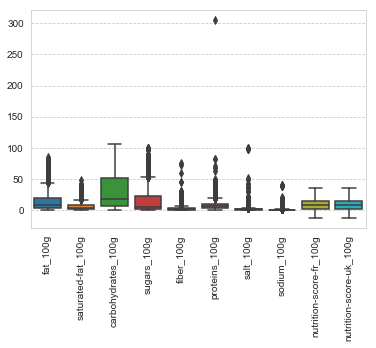

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("white)
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
 })
plot=sns.boxplot(data=data6)
plt.setp(plot.get_xticklabels(), rotation=90)
sns.set_style("dark")


In [35]:
# As part of data cleaning both "nutrition_grade_fr" and 
#"nutrition-score-uk_100g" will be removed as they are another form of identifing the quality 
#of a food item
data7 = data6.drop(columns=["nutrition_grade_fr","nutrition-score-uk_100g"])
data7
#The outcomeis 7633 rows × 10 columns

countries_tags  fat_100g  \
code                                                                         
0000001938067                                          en:canada     10.70   
0000007020254                                          en:france      0.00   
0000008237798                                          en:canada      6.79   
0000027533024                                  en:united-kingdom      7.00   
0000027533048                                  en:united-kingdom      7.00   
000030                                                 en:france     19.00   
000031                                                 en:france     15.00   
000050                                                 en:france     23.00   
000051                                                 en:france     24.00   
000104                                                 en:france     18.00   
00011501                             en:france,en:united-kingdom      0.50   
00011686                                               en:france     17.90   
00011693                             en:france,en:united-kingdom     29.10   
00011709                             en:france,en:united-kingdom     20.50   
00011730                             en:france,en:united-kingdom     15.20   
00011754       en:belgium,en:france,en:netherlands,en:united-...     20.80   
00011778       en:belgium,en:france,en:netherlands,en:united-...     13.30   
00018166                             en:france,en:united-kingdom      0.60   
000227                                                 en:france     20.00   
00023092                                               en:france     26.80   
00028264                                               en:france     11.10   
00031858                                               en:france      2.10   
00053327                                       en:united-kingdom      1.30   
00071093                             en:france,en:united-kingdom     32.50   
00073455                             en:france,en:united-kingdom      1.60   
00074742                                       en:united-kingdom      0.90   
00090100                             en:france,en:united-kingdom      4.40   
0009542018061                                   en:united-states     32.50   
00099332                             en:france,en:united-kingdom      5.30   
0011110020109                                   en:united-states      2.33   
...                                                          ...       ...   
9311493000608                        en:france,en:united-kingdom      0.00   
9311503290852                                       en:australia     30.00   
9311755300477                                       en:australia      0.00   
9315303006453                                       en:australia     12.90   
9315303006460                                       en:australia      6.90   
9315866405014                        en:australia,en:new-zealand     15.00   
9335805000384                                  en:united-kingdom     18.00   
9340514001041                                       en:australia     13.30   
93613910                                          en:new-zealand      0.00   
9400547012114                                     en:new-zealand      0.00   
9400563741784                                     en:new-zealand      8.80   
9414942110252                                     en:new-zealand      1.00   
9414942800979                                     en:new-zealand     10.50   
9415077044467                                     en:new-zealand      1.00   
9415142003511                                     en:new-zealand      2.00   
9415142006291                                     en:new-zealand      2.60   
9415142008592                                     en:new-zealand      2.00   
9415142008752                                     en:new-zealand      5.40   
9415142008776                                     en:new-zealand      4.

In [36]:
#To start understanding the dataset and the impact of one feature on another one, I used linear regression to 
#predict the I tired to used linear regression predict the level of fiber in a food item from the amount of 
#protien as shown below:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4ec89c18>]],
      dtype=object)

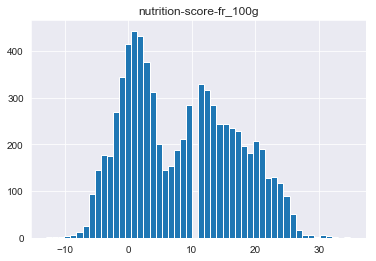

In [52]:
data7[["nutrition-score-fr_100g"]].hist(bins=50)

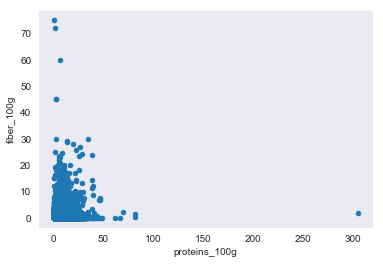

In [37]:
dataR = data7[["proteins_100g", "fiber_100g"]]
dataR.plot(kind = 'scatter', x ="proteins_100g", y= "fiber_100g" )
plt.show()

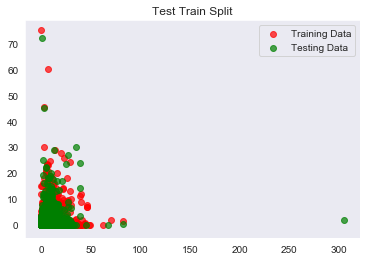

In [38]:
x_train, x_test, y_train, y_test = train_test_split(dataR["proteins_100g"],dataR["fiber_100g"])
plt.scatter(x_train, y_train, label = "Training Data", color = 'r', alpha=0.7)
plt.scatter(x_test, y_test,label = "Testing Data", color = 'g', alpha =0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [39]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)


LinearRegression()

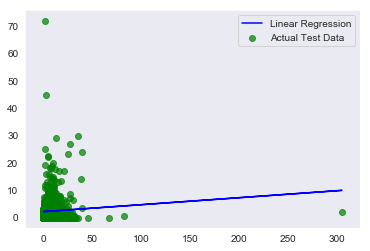

In [40]:
prediction = LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label = 'Actual Test Data', color ='g', alpha =.7 )
plt.legend()
plt.show()

In [ ]:
# The model is in blue against the actual data in green.  

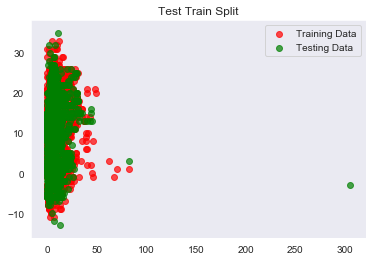

In [41]:
dataR2 = data7[["proteins_100g", "nutrition-score-fr_100g"]]
x_train, x_test, y_train, y_test = train_test_split(dataR2["proteins_100g"],dataR2["nutrition-score-fr_100g"])
plt.scatter(x_train, y_train, label = "Training Data", color = 'r', alpha=0.7)
plt.scatter(x_test, y_test,label = "Testing Data", color = 'g', alpha =0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

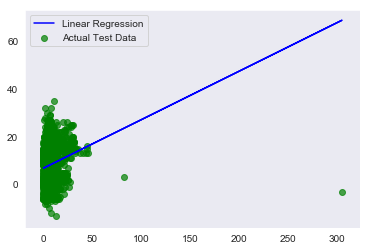

In [42]:
LR2 = LinearRegression()
LR2.fit(x_train.values.reshape(-1,1), y_train.values)
prediction2 = LR2.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction2, label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label = 'Actual Test Data', color ='g', alpha =.7 )
plt.legend()
plt.show()


In [43]:
LR2.predict(np.array([[50]]))[0]

17.003381795097212

In [ ]:
# The model is in blue against the actual data in green.  

In [44]:
data7 = data7.drop(columns=["countries_tags"])
data7

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                           
0000001938067     10.70                2.00               38.70       24.700   
0000007020254      0.00                0.00               14.20       13.600   
0000008237798      6.79                2.86                7.86        0.714   
0000027533024      7.00                3.60               54.20       44.000   
0000027533048      7.00                3.60               54.20       44.000   
000030            19.00                2.50               56.00       28.000   
000031            15.00                2.00               60.00       34.000   
000050            23.00               10.00               51.00       39.000   
000051            24.00               10.00               50.00       37.000   
000104            18.00                2.00               57.00       31.000   
00011501           0.50                0.50               96.00       96.000   
00011686          17.90               11.00               64.30       34.700   
00011693          29.10               17.00               58.40       33.500   
00011709          20.50               13.30               59.30       36.500   
00011730          15.20                8.60               67.50       41.200   
00011754          20.80               13.70               63.60       31.800   
00011778          13.30                7.00               70.20       35.700   
00018166           0.60                0.10               33.10        1.500   
000227            20.00                5.00               57.00       37.000   
00023092          26.80                7.60               54.20       29.400   
00028264          11.10                1.30               63.70       15.100   
00031858           2.10                0.70                5.30        2.400   
00053327           1.30                0.20               77.70        1.500   
00071093          32.50               20.10               53.70       53.500   
00073455           1.60                0.60                7.80        2.700   
00074742           0.90                0.50               59.40       57.400   
00090100           4.40                2.00               16.00        0.500   
0009542018061     32.50               20.00               55.00       52.500   
00099332           5.30                1.90               25.10        1.300   
0011110020109      2.33                0.00               51.20        6.980   
...                 ...                 ...                 ...          ...   
9311493000608      0.00                0.00               12.40       12.400   
9311503290852     30.00                7.00               13.00        0.000   
9311755300477      0.00                0.00               10.60       10.600   
9315303006453     12.90                2.30               20.20        1.900   
9315303006460      6.90                3.40               18.30        1.900   
9315866405014     15.00                3.30               54.00       21.400   
9335805000384     18.00                2.00               26.00       18.000   
9340514001041     13.30                9.70                2.80        1.000   
93613910           0.00                0.00                0.00        0.000   
9400547012114      0.00                0.00               10.10       10.100   
9400563741784      8.80                2.80               65.80       29.500   
9414942110252      1.00                0.10               16.80       11.200   
9414942800979     10.50                2.70               70.40       21.500   
9415077044467      1.00                0.00               60.00       31.100   
9415142003511      2.00                0.40               47.00        2.500   
9415142006291      2.60                0.50               40.00        3.400   
9415142008592      2.00                0.30               48.00        3.500   
9415142008752  

In [45]:
data7.isnull().count()

fat_100g                   7633
saturated-fat_100g         7633
carbohydrates_100g         7633
sugars_100g                7633
fiber_100g                 7633
proteins_100g              7633
salt_100g                  7633
sodium_100g                7633
nutrition-score-fr_100g    7633
dtype: int64

In [46]:
data8= data7
data8

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                           
0000001938067     10.70                2.00               38.70       24.700   
0000007020254      0.00                0.00               14.20       13.600   
0000008237798      6.79                2.86                7.86        0.714   
0000027533024      7.00                3.60               54.20       44.000   
0000027533048      7.00                3.60               54.20       44.000   
000030            19.00                2.50               56.00       28.000   
000031            15.00                2.00               60.00       34.000   
000050            23.00               10.00               51.00       39.000   
000051            24.00               10.00               50.00       37.000   
000104            18.00                2.00               57.00       31.000   
00011501           0.50                0.50               96.00       96.000   
00011686          17.90               11.00               64.30       34.700   
00011693          29.10               17.00               58.40       33.500   
00011709          20.50               13.30               59.30       36.500   
00011730          15.20                8.60               67.50       41.200   
00011754          20.80               13.70               63.60       31.800   
00011778          13.30                7.00               70.20       35.700   
00018166           0.60                0.10               33.10        1.500   
000227            20.00                5.00               57.00       37.000   
00023092          26.80                7.60               54.20       29.400   
00028264          11.10                1.30               63.70       15.100   
00031858           2.10                0.70                5.30        2.400   
00053327           1.30                0.20               77.70        1.500   
00071093          32.50               20.10               53.70       53.500   
00073455           1.60                0.60                7.80        2.700   
00074742           0.90                0.50               59.40       57.400   
00090100           4.40                2.00               16.00        0.500   
0009542018061     32.50               20.00               55.00       52.500   
00099332           5.30                1.90               25.10        1.300   
0011110020109      2.33                0.00               51.20        6.980   
...                 ...                 ...                 ...          ...   
9311493000608      0.00                0.00               12.40       12.400   
9311503290852     30.00                7.00               13.00        0.000   
9311755300477      0.00                0.00               10.60       10.600   
9315303006453     12.90                2.30               20.20        1.900   
9315303006460      6.90                3.40               18.30        1.900   
9315866405014     15.00                3.30               54.00       21.400   
9335805000384     18.00                2.00               26.00       18.000   
9340514001041     13.30                9.70                2.80        1.000   
93613910           0.00                0.00                0.00        0.000   
9400547012114      0.00                0.00               10.10       10.100   
9400563741784      8.80                2.80               65.80       29.500   
9414942110252      1.00                0.10               16.80       11.200   
9414942800979     10.50                2.70               70.40       21.500   
9415077044467      1.00                0.00               60.00       31.100   
9415142003511      2.00                0.40               47.00        2.500   
9415142006291      2.60                0.50               40.00        3.400   
9415142008592      2.00                0.30               48.00        3.500   
9415142008752  

In [47]:
x = data8.drop(columns= 'nutrition-score-fr_100g')
y = data8['nutrition-score-fr_100g']

In [48]:
for i in range(len(y)):
                 if y[i] >= 10:
                       y[i]=1
                 else:
                        y[i]=0
                

In [49]:
#print(y-data8['nutrition-score-fr_100g'])
y

code
0000001938067    0.0
0000007020254    1.0
0000008237798    0.0
0000027533024    1.0
0000027533048    1.0
000030           1.0
000031           1.0
000050           1.0
000051           1.0
000104           1.0
00011501         1.0
00011686         1.0
00011693         1.0
00011709         1.0
00011730         1.0
00011754         1.0
00011778         1.0
00018166         0.0
000227           1.0
00023092         1.0
00028264         1.0
00031858         0.0
00053327         0.0
00071093         1.0
00073455         0.0
00074742         0.0
00090100         0.0
0009542018061    1.0
00099332         0.0
0011110020109    0.0
                ... 
9311493000608    0.0
9311503290852    1.0
9311755300477    0.0
9315303006453    0.0
9315303006460    0.0
9315866405014    0.0
9335805000384    0.0
9340514001041    1.0
93613910         0.0
9400547012114    0.0
9400563741784    0.0
9414942110252    0.0
9414942800979    0.0
9415077044467    0.0
9415142003511    0.0
9415142006291    0.0
94151420

In [51]:
#changing the datatype of y elements to int
type(y)
y = y.astype(int)

pandas.core.series.Series

In [52]:
y

code
0000001938067    0
0000007020254    1
0000008237798    0
0000027533024    1
0000027533048    1
000030           1
000031           1
000050           1
000051           1
000104           1
00011501         1
00011686         1
00011693         1
00011709         1
00011730         1
00011754         1
00011778         1
00018166         0
000227           1
00023092         1
00028264         1
00031858         0
00053327         0
00071093         1
00073455         0
00074742         0
00090100         0
0009542018061    1
00099332         0
0011110020109    0
                ..
9311493000608    0
9311503290852    1
9311755300477    0
9315303006453    0
9315303006460    0
9315866405014    0
9335805000384    0
9340514001041    1
93613910         0
9400547012114    0
9400563741784    0
9414942110252    0
9414942800979    0
9415077044467    0
9415142003511    0
9415142006291    0
9415142008592    0
9415142008752    0
9415142008776    0
9416050526413    1
9417986936963    0
9417986

In [53]:
x.head()

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                           
0000001938067     10.70                2.00               38.70       24.700   
0000007020254      0.00                0.00               14.20       13.600   
0000008237798      6.79                2.86                7.86        0.714   
0000027533024      7.00                3.60               54.20       44.000   
0000027533048      7.00                3.60               54.20       44.000   

               fiber_100g  proteins_100g  salt_100g  sodium_100g  
code                                                              
0000001938067       2.000           3.33   0.647000      0.25500  
0000007020254       0.000           0.00   0.061600      0.02420  
0000008237798       0.357           5.36   0.499000      0.19600  
0000027533024       4.700           3.90   0.200000      0.07874  
0000027533048       4.700           3.90   0.199898      0.07870

In [54]:
y.head()

code
0000001938067    0
0000007020254    1
0000008237798    0
0000027533024    1
0000027533048    1
Name: nutrition-score-fr_100g, dtype: int64

In [55]:
########################## Data Preparation ###################
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=123)


In [56]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5343, 8), (5343,), (2290, 8), (2290,))

In [57]:
# numeric features
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
print(numeric_features)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


In [58]:
# categorical features
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(categorical_features)

[]


In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [60]:
# build pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())])

In [61]:
numeric_pipeline.fit_transform(X_train.select_dtypes(include='number'))

array([[1.17647059e-02, 1.45833333e-02, 1.17924528e-01, ...,
        1.14754098e-02, 1.27127127e-03, 1.27226463e-03],
       [1.76470588e-01, 1.87500000e-01, 3.90566038e-01, ...,
        1.96721311e-02, 9.00900901e-03, 9.01604857e-03],
       [0.00000000e+00, 0.00000000e+00, 1.41509434e-01, ...,
        0.00000000e+00, 2.00200200e-04, 2.00356635e-04],
       ...,
       [5.88235294e-03, 2.08333333e-03, 1.13207547e-01, ...,
        1.63934426e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.13207547e-01, ...,
        0.00000000e+00, 1.20120120e-04, 1.20101781e-04],
       [3.05882353e-02, 3.54166667e-02, 1.21698113e-01, ...,
        1.04918033e-02, 1.50150150e-03, 1.50267476e-03]])

In [62]:
from sklearn.compose import ColumnTransformer

data_pipeline = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_features)
])

In [63]:
# fit entire data pipeline
data_pipeline.fit_transform(X_train)

array([[1.17647059e-02, 1.45833333e-02, 1.17924528e-01, ...,
        1.14754098e-02, 1.27127127e-03, 1.27226463e-03],
       [1.76470588e-01, 1.87500000e-01, 3.90566038e-01, ...,
        1.96721311e-02, 9.00900901e-03, 9.01604857e-03],
       [0.00000000e+00, 0.00000000e+00, 1.41509434e-01, ...,
        0.00000000e+00, 2.00200200e-04, 2.00356635e-04],
       ...,
       [5.88235294e-03, 2.08333333e-03, 1.13207547e-01, ...,
        1.63934426e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.13207547e-01, ...,
        0.00000000e+00, 1.20120120e-04, 1.20101781e-04],
       [3.05882353e-02, 3.54166667e-02, 1.21698113e-01, ...,
        1.04918033e-02, 1.50150150e-03, 1.50267476e-03]])

In [64]:
# we can now use data_pipeline to transform X_train and X_test
X_train_transformed = data_pipeline.transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

In [65]:
X_train_transformed.shape, X_test_transformed.shape

((5343, 8), (2290, 8))

In [66]:
############# Logistic Regression ##############

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [111]:
# I tired using corss validaiton but did have time for trubleshooting 
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x, y, cv=5, scoring='r2')

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Kholoud/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Kholoud/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/Users/Kholoud/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 581, in _validate_data
   

array([nan, nan, nan, nan, nan])

In [69]:
# fit the model
lr.fit(X_train_transformed, Y_train)

LogisticRegression()

In [70]:
# predict labels on X_test
y_pred = lr.predict(X_test_transformed)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [71]:
# predict probability on X_test
y_pred_proba = lr.predict_proba(X_test_transformed)
y_pred_proba

array([[9.28098646e-01, 7.19013538e-02],
       [5.43546791e-04, 9.99456453e-01],
       [8.49436542e-01, 1.50563458e-01],
       ...,
       [6.43523443e-03, 9.93564766e-01],
       [8.09791811e-01, 1.90208189e-01],
       [4.40620894e-01, 5.59379106e-01]])

In [72]:
# accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8934497816593886

In [73]:
# AUC on test set
from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_test, y_pred_proba[:,1])

In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[1152   81]
 [ 163  894]]


In [75]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1233
           1       0.92      0.85      0.88      1057

    accuracy                           0.89      2290
   macro avg       0.90      0.89      0.89      2290
weighted avg       0.89      0.89      0.89      2290



/Users/Kholoud/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


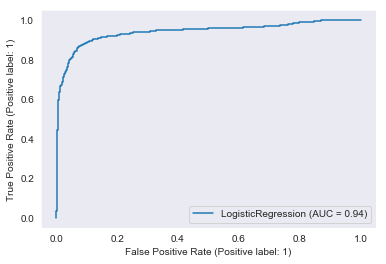

In [76]:
# AUC plot
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test_transformed, Y_test)

In [92]:
#          Random Forest Pipeline
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', rf_model)])
rf_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['fat_100g',
                                                   'saturated-fat_100g',
                                                   'carbohydrates_100g',
                                                   'sugars_100g', 'fiber_100g',
                                                   'proteins_100g', 'salt_100g',
                                                   'sodium_100g'])])),
                ('model', RandomForestClassifier())])

In [93]:
y_pred = rf_pipeline.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [94]:
# accuracy on test set using rf_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9528384279475982

In [95]:
# confusion matrix from rf_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[1172   61]
 [  47 1010]]


In [96]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1233
           1       0.94      0.96      0.95      1057

    accuracy                           0.95      2290
   macro avg       0.95      0.95      0.95      2290
weighted avg       0.95      0.95      0.95      2290



In [81]:
##############Support Vector Machine Pipeline

In [97]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', svm_model)])
# fit pipeline with model
svm_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['fat_100g',
                                                   'saturated-fat_100g',
                                                   'carbohydrates_100g',
                                                   'sugars_100g', 'fiber_100g',
                                                   'proteins_100g', 'salt_100g',
                                                   'sodium_100g'])])),
                ('model', SVC(probability=True))])

In [98]:
# predictions from pipeline
y_pred = svm_pipeline.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [99]:
# accuracy on test set using svm_pipeline
#from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9104803493449781

In [100]:
# confusion matrix from svm_pipeline
#from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[1162   71]
 [ 134  923]]


In [101]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1233
           1       0.93      0.87      0.90      1057

    accuracy                           0.91      2290
   macro avg       0.91      0.91      0.91      2290
weighted avg       0.91      0.91      0.91      2290



In [ ]:
############# K Nearest Neighbour Pipeline #########

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', knn_model)])
# fit pipeline with model
knn_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['fat_100g',
                                                   'saturated-fat_100g',
                                                   'carbohydrates_100g',
                                                   'sugars_100g', 'fiber_100g',
                                                   'proteins_100g', 'salt_100g',
                                                   'sodium_100g'])])),
                ('model', KNeighborsClassifier())])

In [87]:
# predictions from pipeline
y_pred = knn_pipeline.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [88]:
# accuracy on test set using knn_pipeline
#from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9244541484716157

In [89]:
# confusion matrix from knn_pipeline
#from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[1149   84]
 [  89  968]]


In [91]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1233
           1       0.92      0.92      0.92      1057

    accuracy                           0.92      2290
   macro avg       0.92      0.92      0.92      2290
weighted avg       0.92      0.92      0.92      2290



In [ ]:
#######End of the file